# Computer Vision I (922 U0610) - Homework 10
Author: alanhc

ID: r10944007

Date: 10/27

## README
0. create env: `conda env create -f environment.yml`
1. enter env: `conda activate ntu-cv`
2. run jupyter `jupyter notebook`

Implement 2 Laplacian Mask, Minimum Variance Laplacian, Laplacian of Gaussian, and Difference of Gaussian(inhibitory sigma=3, excitatory sigma=1, kernel size 11x11).
Please list the kernels and the thresholds(for zero crossing) you used.
Threshold Values listed below are for reference:
(僅供參考，同學可自己找出 Edge Image 品質最佳的門檻值threshold value)
- (a) Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0): 15
- (b) Laplace Mask2 (1, 1, 1, 1, -8, 1, 1, 1, 1)
- (c) Minimum variance Laplacian: 20
- (d) Laplace of Gaussian: 3000
- (e) Difference of Gaussian: 1

image shape: (512, 512)


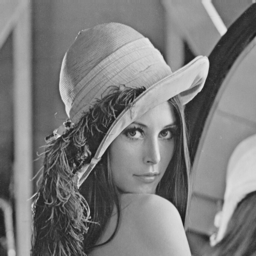

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math


# Todo: 讀檔，確定影像大小
img = Image.open("input/lena.bmp")
img = np.array(img)

h, w = img.shape

print("image shape:", img.shape)
show = Image.fromarray(img).resize((256,256))
show

## algorithm
### 1. laplacian
### 2. zerocross

## Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0): 15
## Laplace Mask2 (1, 1, 1, 1, -8, 1, 1, 1, 1)
## Minimum variance Laplacian: 20

In [2]:
# 先擴充，使其可以做laplacian運算
img_padding = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
l_1 = np.array([[ 0, 1, 0],
                [ 1,-4, 1],
                [ 0, 1, 0],])
l_2 = np.array([[ 1, 1, 1],
                [ 1,-8, 1],
                [ 1, 1, 1],])
l_2 = l_2/3
mvl = np.array([[ 2,-1, 2],
                [-1,-4,-1],
                [ 2,-1, 2],])
mvl = mvl/3

h,w = img.shape

def window(img, y, x, kernel):
    now = 0
    for ky in range(kernel.shape[0]):
        for kx in range(kernel.shape[1]):
            now += img[y+ky][x+kx] * kernel[ky][kx]
    return now

def laplacian(img, kernel, threshold):
    img = img.copy()
    img_laplace = np.zeros((h,w))
    for y in range(h):
        for x in range(w):
            # gradient magnitude
            now = window(img, y,x, kernel)
            if now>=threshold:
                img_laplace[y][x] = 1
            elif now<=-threshold:
                img_laplace[y][x] = -1
            else:
                img_laplace[y][x] = 0   
    return img_laplace

# 1. 
img_laplace_1 = laplacian(img_padding, l_1, 15)
img_laplace_2 = laplacian(img_padding, l_2, 15)           
img_laplace_minimum_variance = laplacian(img_padding, mvl, 20)  

def checkneighbor(y,x,img_laplace):
    for ky in np.arange(-1,2):
        for kx in np.arange(-1,2):
            if (img_laplace[y+ky][x+kx]==-1):
                return 1
    return 0
        
def zero_cross(img_laplace):
    img_laplace = img_laplace.copy()
    img_laplace = cv2.copyMakeBorder(img_laplace, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
    ans = np.full((h,w), 255)
    for y in range(1, h):
        for x in range(1, w):
            # 如果從1(中心)->-1(周遭)，就把它設為邊(0)
            if (img_laplace[y][x]==1 and checkneighbor(y,x,img_laplace)==1):
                ans[y-1][x-1] = 0
                
    return ans
# 2. 
img_laplacian_1 = zero_cross(img_laplace_1) 
img_laplacian_2 = zero_cross(img_laplace_2)
img_laplacian_minimum_variance = zero_cross(img_laplace_minimum_variance)

## Laplace of Gaussian: 3000
## Difference of Gaussian: 1

In [3]:
l_gauss = np.array([
                [  0,  0,  0, -1, -1, -2, -1, -1,  0,  0,  0],
                [  0,  0, -2, -4, -8, -9, -8, -4, -2,  0,  0],
                [  0, -2, -7,-15,-22,-23,-22,-15, -7, -2,  0],
                [ -1, -4,-15,-24,-14, -1,-14,-24,-15, -4, -1],
                [ -1, -8,-22,-14, 52,103, 52,-14,-22, -8, -1],
                [ -2, -9,-23, -1,103,178,103, -1,-23, -9, -2],
                [ -1, -8,-22,-14, 52,103, 52,-14,-22, -8, -1],
                [ -1, -4,-15,-24,-14, -1,-14,-24,-15, -4, -1],
                [  0, -2, -7,-15,-22,-23,-22,-15, -7, -2,  0],
                [  0,  0, -2, -4, -8, -9, -8, -4, -2,  0,  0],
                [  0,  0,  0, -1, -1, -2, -1, -1,  0,  0,  0],
               ])
l_diff_gauss = np.array([
                [ -1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
                [ -3, -5, -8,-11,-13,-13,-13,-11, -8, -5, -3],
                [ -4, -8,-12,-16,-17,-17,-17,-16,-12, -8, -4],
                [ -6,-11,-16,-16,  0, 15,  0,-16,-16,-11, -6],
                [ -7,-13,-17,  0, 85,160, 85,  0,-17,-13, -8],
                [ -8,-13,-17, 15,160,283,160, 15,-17,-13, -8],
                [ -7,-13,-17,  0, 85,160, 85,  0,-17,-13, -8],
                [ -6,-11,-16,-16,  0, 15,  0,-16,-16,-11, -6],
                [ -4, -8,-12,-16,-17,-17,-17,-16,-12, -8, -4],
                [ -3, -5, -8,-11,-13,-13,-13,-11, -8, -5, -3],
                [ -1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
               ])

img_padding = cv2.copyMakeBorder(img,5,5,5,5,cv2.BORDER_REFLECT)
# 1.
img_laplace_gauss = laplacian(img_padding, l_gauss, 3000)  
img_laplace_diff_gauss = laplacian(img_padding, l_diff_gauss, 1)  
# 2.
img_laplacian_gauss = zero_cross(img_laplace_gauss)
img_laplacian_diff_gauss = zero_cross(img_laplace_diff_gauss)

## Laplace Mask1 (0, 1, 0, 1, -4, 1, 0, 1, 0): 15

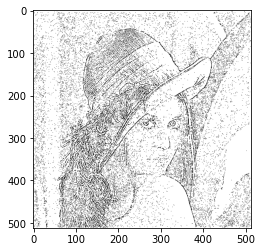

In [4]:
img_laplacian_1 = img_laplacian_1.astype(np.uint8)
plt.imshow(img_laplacian_1, cmap="gray")
Image.fromarray(img_laplacian_1).convert('RGB').save("output/Laplace_1_15.png")

## Laplace Mask2 (1, 1, 1, 1, -8, 1, 1, 1, 1) 15

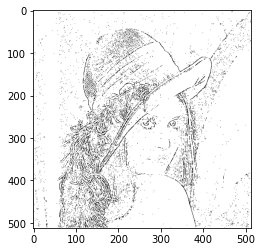

In [5]:
img_laplacian_2 = img_laplacian_2.astype(np.uint8)
plt.imshow(img_laplacian_2, cmap="gray")
Image.fromarray(img_laplacian_2).convert('RGB').save("output/Laplace_2_15.png")

## Minimum variance Laplacian: 20

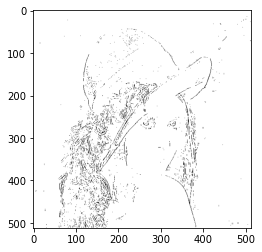

In [6]:
img_laplacian_minimum_variance = img_laplacian_minimum_variance.astype(np.uint8)
plt.imshow(img_laplacian_minimum_variance, cmap="gray")
Image.fromarray(img_laplacian_minimum_variance).convert('RGB').save("output/Laplace_minimum_variance_20.png")

## Laplace of Gaussian: 3000

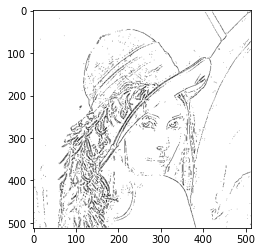

In [7]:
img_laplacian_gauss = img_laplacian_gauss.astype(np.uint8)
plt.imshow(img_laplacian_gauss, cmap="gray")
Image.fromarray(img_laplacian_gauss).convert('RGB').save("output/Laplace_gauss_3000.png")

## Difference of Gaussian: 1

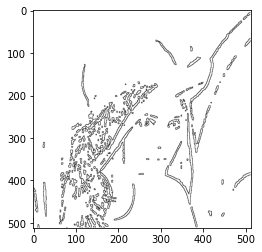

In [8]:
img_laplacian_diff_gauss = img_laplacian_diff_gauss.astype(np.uint8)
plt.imshow(img_laplacian_diff_gauss, cmap="gray")
Image.fromarray(img_laplacian_diff_gauss).convert('RGB').save("output/Laplace_diff_gauss_1.png")

Ref
- textbook
- ppt

